In [32]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import xarray as xr


In [361]:
CLT_t_ = [ 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 440] # 360, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] # 280, 320, 340, 360, 380, 
GL_h_ = [ 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800 ] # 320, 360, 400,


In [362]:
# Frame Geometry
L_X = 30000
L_Y = 7560*4 # 40000

N_X = np.array([3, 4,5,6,7,8,9,10])
N_Y = np.array([4]) # ,5,6,7,8,9,10


Dx = L_X/(N_X)
Dy = L_Y/(N_Y)

In [363]:
# Loads
q_DL_d = 2 # kN/m^2
q_LL_d = 2.55 # kN/m^2
q_DL_facade = 2 # kN/m

In [364]:
# Load coefficients
#ULS
gamma_ULS_DL = 1.35
gamma_ULS_LL_A = 1.5

Psi_LL_B = [0.7, 0.5, 0.3]
#SLS - characteristic/rare

gamma_SLSc_DL = 1.0
gamma_SLSc_LL_A = 1.0

#SLS - Quasi permanent
gamma_SLSqp_DL = 1.0
gamma_SLSqp_LL_A = 1.0

#SLS - Frequent
gamma_SLSf_DL = 1.0
gamma_SLSf_LL_A = 1.0

# Material

In [365]:
# Material 

# CLT
Mat_01 = 'GL24h'
fm_k = 24 # MPa
ft_0_k = 14 # MPa
ft_90_k = 0.12 # MPa
fc_0_k = 21 # MPa
fc_90_k = 2.5 # MPa
fv_k = 4 # MPa
Em_0_mean = 12000 # MPa
#Em_90_mean = 1
#Em_0_mean = 1
G_mean = 690 # MPa


# Glulam GL24h
GL24h = {
"fm_k" : 24 , # MPa,
"ft_0_k" : 19.2, # MPa
"ft_90_k" : 0.5 ,# MPa
"fc_0_k" : 24 , # MPa
"fc_90_k" : 2.5 , # MPa
"fv_k" : 3.5 , # MPa
"Em_0_mean" : 11500 , # MPa
#Em_90_mean = 1
#Em_0_mean = 1
"G_mean" : 650
}

gamma_m_CLT = 1.3
k_mod_CLT = 0.8 # K_mod for CLT in service class 1 = 0.8
k_mod_GL = 0.8 


# Section properties

In [366]:
# Section properties
# CLT
# A_net mm^2 Net Area of CLT section 
# A_tot mm^2 Total Area of CLT section  
# I_net mm^4 moment od inertia net section
# I_tot mm^4 moment of inertia total section

CLT_properties = pd.DataFrame(columns= ['Name', 'thk', 'A_net', 'A_tot' , 'I_net', 'I_tot'])

CLT_properties.loc[0] = [ 'CLT 180 L5s', 180, 120000, 180000, 408000000, 486000100 ]
CLT_properties.loc[1] = [ 'CLT 200 L5s', 200, 120000, 200000, 527999900, 666666700 ]
CLT_properties.loc[2] = [ 'CLT 220 L7s - 2', 220, 160000, 220000, 809333300, 887333400 ]
CLT_properties.loc[3] = [ 'CLT 240 L5s - 2', 240, 200000, 240000, 1114666000, 1152000000 ]
CLT_properties.loc[4] = [ 'CLT 260 L5s - 2', 260, 200000, 260000, 1386666000, 1464666000   ]
CLT_properties.loc[5] = [ 'CLT 280 L7s - 2', 280, 200000, 280000, 1690666000, 1829333000 ]
CLT_properties.loc[6] = [ 'CLT 300 L7s - 2', 300, 240000, 300000, 2063999000, 2250000000  ]
CLT_properties = CLT_properties.set_index('thk')                      

E_CLT_i = Em_0_mean


# Glulam
# b_GL_i = 400
# h_GL_i = 680

# A_GL_i = b_GL_i * h_GL_i

# I_GL_y_i = 1/12 * b_GL_i * h_GL_i**3 # mm^4 moment od inertia about y axis
# I_GL_z_i = 1/12 * h_GL_i * b_GL_i**3 # mm^4 moment od inertia about z axis


# E_CLT_i = Em_0_mean

In [367]:
def w_2span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  1 / 185 * q * L**4 / (E*I) 
    
def w_1span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  5 / 384 * q * L**4 / (E*I) 

In [368]:
dict = ["Dx" , "Dy", "t_CLT" , "GL_b" , "GL_h" , "w_fin" ,"Volume_Timber" ]

pd.options.display.float_format = ' {:.1f}'.format
#pd.set_option('colheader_justify', 'center')


#from IPython.display import HTML

Data_Set = pd.DataFrame(columns=dict)

# Volume_Matrix.style.set_properties(**{'align': 'center'})

#pd.DataFrame(dict).xs['Volume_Timber',0] 

#left_aligned_df = pd.DataFrame(dict).style.set_properties(**{'text-align': 'center'})
#display(left_aligned_df)
# 
# Matrix_CLT_thick = pd.DataFrame({'t_CLT':t_CLT[0], 'Volume_': [Data_Set] } ).set_index('t_CLT')


In [369]:
#Volume_Matrix.loc[ii,'Volume_Timber'] = 10
# Matrix_CLT_thick.loc[160,'Volume_']

In [370]:
# Deflections check
# w_123 = w1+w2+w3
Data_Set = pd.DataFrame(columns=dict)

Data_Set_Null = pd.DataFrame(columns=dict)

Data_Set_i = Data_Set_Null
zz=0
for ii_N_X in N_X:
    ii_Dx = L_X/(ii_N_X)
    for ii_N_Y in N_Y:
        ii_Dy = L_Y/(ii_N_Y)
        for tt_CLT_i in CLT_t_:
            
            for ii_GL_b in GL_b_:
                for  ii_GL_h in GL_h_:

                    Data_Set_i = Data_Set_Null
        #            for ii in range(0,len(N_X)):

                    Data_Set_i.loc[kk,'Dx'] = ii_Dx
                    Data_Set_i.loc[kk,'Dy'] = ii_Dy
                    Data_Set_i.loc[kk,'t_CLT'] = tt_CLT_i
                    Data_Set_i.loc[kk,'GL_b'] = ii_GL_b
                    Data_Set_i.loc[kk,'GL_h'] = ii_GL_h
                


            #         t_CLT_i = t_CLT_i
                    E_CLT_i = E_CLT_i
                    I_CLT_i = CLT_properties['I_net'][tt_CLT_i]
                    L_CLT_i = ii_Dx


                    q_CLT_i = ( q_DL_d * gamma_ULS_DL + q_LL_d * gamma_SLSc_LL_A ) * 1000 / 10**6 * 1000 # N/mm^2

                    w_CLT = w_2span_unifLoad(E_CLT_i, I_CLT_i, L_CLT_i, q_CLT_i) / k_mod_CLT  # mm - Deflection CLT, units in N, mm

                    E_GL_i = GL24h["Em_0_mean"]
                    
                    
                    I_GL_y_i = 1/12 * ii_GL_b * ii_GL_h**3 # mm^4 moment od inertia about y axis
                    
                    L_GL_i = ii_Dy
                    q_GL_i = 10/8 * q_CLT_i/1000 * L_CLT_i

                    # Deflection limit
                    L_defl = (L_CLT_i**2 + L_GL_i**2)**0.5
                    w_lim = L_defl / 333 

                    w_GL_1 = w_1span_unifLoad(E_GL_i, I_GL_y_i, L_GL_i, q_GL_i) / k_mod_GL # mm - Deflection od Glulam beam, units in N, mm


                    Data_Set_i.loc[kk,'w_fin'] = w_CLT + w_GL_1



                    if w_CLT+w_GL_1 < w_lim:    

                        # Volume

                        Vol_CLT = tt_CLT_i * L_X * L_Y / 10**9 # m^3 Volume of CLT per floor
                        Vol_GL_1 = ii_N_X * b_GL_i * h_GL_i * L_Y / 10**9 # m^3 Volume of Glulam per floor

                        Data_Set_i.loc[kk,'Volume_Timber'] = Vol_CLT + Vol_GL_1

                    else : 
                        Data_Set_i.loc[kk,'Volume_Timber'] = np.nan
                        
                    Data_Set = pd.concat([Data_Set, Data_Set_i])
                    
                    zz = zz + 1


Data_Set = Data_Set.set_index(np.array(range(0,zz)))

In [158]:
Data_Set = Data_Set.set_index(np.array(range(0,zz)))

In [65]:
# Data_Set_Null = pd.DataFrame(columns=dict)
# Data_Set_i = Data_Set_Null
# kk=8
# Data_Set_i.loc[kk,'Dx'] = 99

# Data_Set_i

# Data_Set = pd.concat([Data_Set, Data_Set_i])



,Dx,Dy,t_CLT,GL_b,GL_h,w_fin,Volume_Timber
0,15000.0,7560.0,180,400,440,527.1,NaN
1,15000.0,7560.0,180,400,480,490.2,NaN
2,15000.0,7560.0,180,400,520,463.9,NaN
3,15000.0,7560.0,180,400,560,444.5,NaN
4,15000.0,7560.0,180,400,600,430.0,NaN
...,...,...,...,...,...,...,...
6295,3000.0,7560.0,300,600,640,7.1,354.4
6296,3000.0,7560.0,300,600,680,5.9,354.4
6297,3000.0,7560.0,300,600,720,5.0,354.4
6298,3000.0,7560.0,300,600,760,4.3,354.4


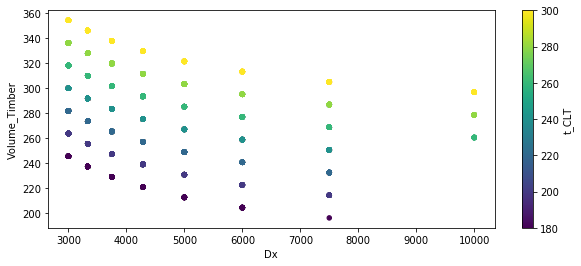

In [238]:
Data_Set.plot(kind='scatter',x='Dx',y='Volume_Timber',c='t_CLT', colormap='viridis',figsize=(10,4), sharex=False)
plt.show()

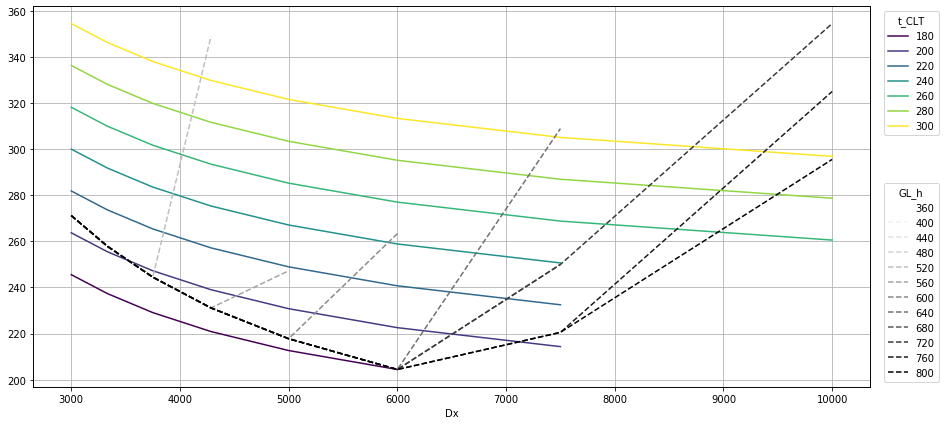

In [371]:
# plot data
# fig = plt.figure()
# ax = fig.add_subplot(111)
fig, ax1 = plt.subplots(figsize=(15,7))

# use unstack()
CLT_plt = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().plot(ax=ax1,colormap='viridis')
# leg1 = ax1.legend(loc='upper left',title = "t_CLT", bbox_to_anchor=(1.01, 1))
ax1.legend(loc='upper left',title = "t_CLT",bbox_to_anchor=(1.01, 1))

ax2 = ax1.twinx()
GL_B_plt = Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().plot(ax=ax2,colormap='Greys', linestyle ='--' )
# leg2 = ax2.legend(loc='lower left',bbox_to_anchor=(1.01, 0))
# 
# ax2.legend(loc=0)
ax2.legend(loc='lower left',title = "GL_h",bbox_to_anchor=(1.01, 0))
# ax = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().plot(ax=ax,colormap='Blues' )

# fig, ax = plt.subplots()
# Data_Set.groupby('t_CLT').plot(x='Dx', y= 'Volume_Timber', ax=ax)

# ax1 = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].max().unstack().plot(ax=ax)
ax1.grid()
# ax2.patch.set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

# n = Data_Set['GL_b']
# for i, txt in enumerate(n):
#     ax.annotate(txt, (Data_Set.loc[i,'Dx'], Data_Set.loc[i,'t_CLT']))

# plt.legend(title = "t_CLT")
# Add first legend:  only labeled data is included
# leg1 = ax.legend(loc='upper right',title = "t_CLT")
# Add second legend for the maxes and mins.
# leg1 will be removed from figure
# leg2 = ax2.legend(loc='lower right')
# Manually add the first legend back
# ax2.add_artist(leg1)

# fig.tight_layout() 
# plt.show()

In [300]:
# uu = Data_Set.groupby('t_CLT').min().index.values

# fig, ax = plt.subplots()
# Data_Set.groupby('t_CLT').plot(x='Dx', y= 'Volume_Timber', linestyle ='--')





In [252]:
# Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min()

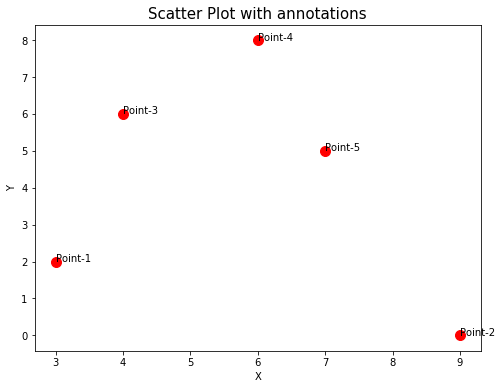

In [168]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)

X=np.random.randint(10, size=(5))
Y=np.random.randint(10, size=(5))

annotations=["Point-1","Point-2","Point-3","Point-4","Point-5"]

plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=100,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

In [ ]:
dict = {"Dx": Dx,
       "Dy": Dy[ii] * np.ones(len(Dx)),
       "t_CLT": np.ones(len(Dx)),
       "Volume_Timber": np.ones(len(Dx)).astype(int) 
       }

import pandas as pd
pd.options.display.float_format = ' {:.1f}'.format
Volume_Matrix = pd.DataFrame(dict)


print(Volume_Matrix)

In [226]:
Data_Set

,Dx,Dy,t_CLT,GL_b,GL_h,w_fin,Volume_Timber
0,15000.0,7560.0,180,360,30,562208.1,NaN
1,15000.0,7560.0,180,360,400,603.8,NaN
2,15000.0,7560.0,180,360,440,544.9,NaN
3,15000.0,7560.0,180,360,480,504.0,NaN
4,15000.0,7560.0,180,360,520,474.7,NaN
...,...,...,...,...,...,...,...
8311,3000.0,7560.0,300,600,640,7.1,354.4
8312,3000.0,7560.0,300,600,680,5.9,354.4
8313,3000.0,7560.0,300,600,720,5.0,354.4
8314,3000.0,7560.0,300,600,760,4.3,354.4


In [ ]:
np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))


In [ ]:
base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

t_CLT = [160, 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 280, 320, 340, 360, 380, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] 
#GL_h_


ds = xr.Dataset(
    {
        "CLT_thickness": (("time", "location"), t_CLT),
    #    "GL_width": (("time", "location"), GL_b_),
    },
#    {"time": Volume_Matrix['t_CLT'], "location": Volume_Matrix['t_CLT'] },
)

ds

In [ ]:
tmin_values
times
len(tmax_values)

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
times

Volume_Matrix['Volume_Timber']

Volume_Matrix['t_CLT']

In [ ]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(t_CLT)
foo


In [ ]:
df = xr.DataArray(Volume_Matrix)
df

In [ ]:
np.ones(4)

In [ ]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

GL_b_h = []
for i in range(len(GL_b_)):
    for j in range(len(GL_h_)):
        GL_b_h.append([GL_b_[i], GL_h_[j]])
        

Frame_Dx_Dy = []
for i in range(len(Dx)):
    for j in range(len(Dy)):
        Frame_Dx_Dy.append([Dx[i], Dy[j]])
        
#lon = [[GL_b_], [GL_b_]]

ds = []

ds = xr.Dataset(
    {
        "ds_CLT": ( ['w1', 'w2', 'w3', 'Volume'], np.random.randn( 4,2,2, 2)), #['w1', 'w2', 'w3', 'Volume'],
        "ds_Glulam": (['w1', 'w2', 'w3', 'Volume'], 10*np.random.randn(4,2,2, 2)),
    },
    coords={
        "CLT_thk": ("CLT_t", CLT_t_),
#         "CLT_thk": (['w1', 'w2'], np.random.randn(3, 2)),
#        "Glulam_": (["GL_b", "GL_h"], GL_b_h),
#        "Frame_Dx_Dy": (["Dx", "Dy"], Frame_Dx_Dy),
#        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

ds

In [ ]:
ds.drop_sel(CLT_thk=[0])

In [ ]:
#ds.sel(Glulam_=[0])

temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)


ds["temperature"]
        

In [ ]:
len(np.random.randn(2, 2, 3))

In [ ]:
np.random.randn(2, 2, 3)

In [ ]:
import numpy as np
import pandas as pd

import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds

In [ ]:
times?

In [ ]:
df.describe()
ds.mean(dim="location").to_dataframe().plot()

freeze = (ds["tmin"] <= 0).groupby("time.month").mean("time")
freeze

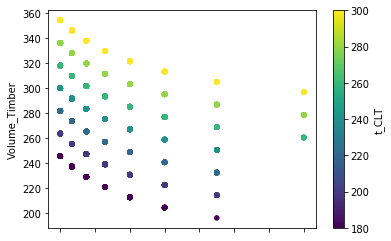

In [109]:
# Data_Set.plot(kind='scatter',x='GL_h',y='Volume_Timber',color='red',figsize=(10,4))
ax2 = Data_Set.plot.scatter(x='Dx',
                      y='Volume_Timber',
                      c='t_CLT',
                      colormap='viridis')
# plt.show()

In [101]:
uuu = Data_Set.groupby(['Dx']).size()
uuu

Dx
3000.0     924
3333.3     924
3750.0     924
4285.7     924
5000.0     924
6000.0     924
7500.0     924
10000.0    924
15000.0    924
dtype: int64

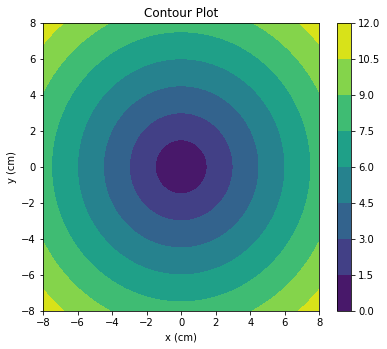

In [91]:

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [93]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.4,0.9,0.4,0.6
1,0.4,0.9,0.7,0.8
2,0.1,0.4,0.7,0.1
3,0.0,0.6,0.3,0.3
4,0.4,0.8,0.1,0.8
5,0.7,0.1,0.5,0.7
6,0.5,0.0,0.5,0.2
7,0.9,0.1,0.9,0.9
8,0.8,0.7,0.6,0.2
9,0.8,0.4,1.0,0.3
